In [1]:
import pandas as pd
import numpy as np
import cv2 as cv2
import os
import shutil
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img_path = "FootballPlayerImageClassifier/model/dataset/"
cropped_path = "FootballPlayerImageClassifier/model/dataset/cropped/"
opnecv_harr_cascade = "FootballPlayerImageClassifier/model/opencv/"

In [3]:
img = cv2.imread(img_path+'lionel_messi/2.jpg')
img.shape

(1067, 912, 3)

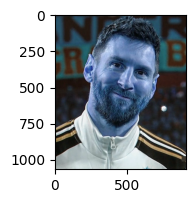

In [4]:
img_width = 6
img_height = 2

plt.figure(figsize=(img_width, img_height))
plt.imshow(img)

In [5]:
#convert image color space
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1067, 912)

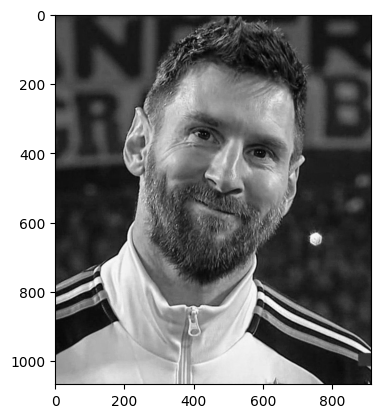

In [6]:
#plt.figure(figsize=(img_width, img_height))
plt.imshow(gray, cmap='gray')

In [7]:
# Detect faces using Haar Cascade classifier
face_cascade = cv2.CascadeClassifier(opnecv_harr_cascade+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(opnecv_harr_cascade+'haarcascade_eye.xml')

# gray: The grayscale image on which to perform face detection
# scaleFactor: Controls image scaling at each step. Smaller values make detection more sensitive to small faces
# minNeighbors: Specifies the number of neighbors a region should have to be considered as a face
face = face_cascade.detectMultiScale(gray, 1.1, 3)
face

array([[238, 175, 526, 526]])

In [8]:
(x, y, w, h) = face[0]
x, y, w, h

(238, 175, 526, 526)

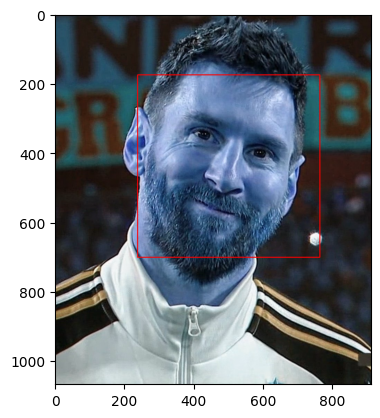

In [9]:
rectangle_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(rectangle_img)

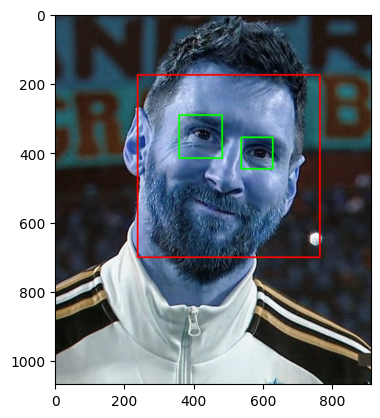

In [10]:
cv2.destroyAllWindows()
faces = face_cascade.detectMultiScale(gray, 1.1, 3)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0), 3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.3 ,3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0), 3)

plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

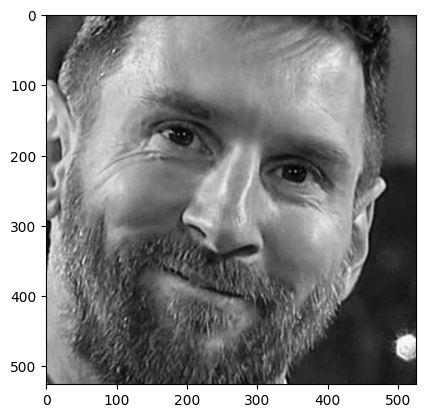

In [11]:
plt.imshow(roi_gray, cmap="gray")

In [12]:
def get_cropped_images(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 3)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 3)
        if len(eyes) >= 2:
            return roi_color

## Cropped

In [14]:
# Create cropped folder if not exists and remove previosus version
'''if os.path.exists(cropped_path):
    shutil.rmtree(cropped_path)
os.makedirs(cropped_path)'''

In [15]:
'''img_dirs = [file for file in files if file != "cropped"]
cropped_image_dirs = []
sport_file_name_dict = {}

for img_dir in img_dirs:
    
    print(f"---{img_dir}---")
    
    sport_file_name_dict[img_dir] = []
    
    for entry in os.scandir(f'{img_path}{img_dir}'):
        path = (img_path + img_dir + ('/') + entry.name)
        print(path)
        
        roi_color = get_cropped_images(path)
        
        print(entry.name)
        
        if roi_color is not None:
            cropped_folder = cropped_path + img_dir
            print("Validation of the image is successful \n")
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Genearting cropped images in folders \n")
                
            cropped_file_name = (cropped_folder + ('/') + entry.name)
            print(cropped_file_name)
                
            cv2.imwrite(cropped_file_name, roi_color)
            sport_file_name_dict[img_dir].append(cropped_file_name)
            print(f"Saved the cropped image {entry.name} \n")
        else:
            print("Not valid \n")
            '''

---kylian_mbappe---
FootballPlayerImageClassifier/model/dataset/kylian_mbappe/1.jpg
1.jpg
Validation of the image is successful 

Genearting cropped images in folders 

FootballPlayerImageClassifier/model/dataset/cropped/kylian_mbappe/1.jpg
Saved the cropped image 1.jpg 

FootballPlayerImageClassifier/model/dataset/kylian_mbappe/11.jpg
11.jpg
Not valid 

FootballPlayerImageClassifier/model/dataset/kylian_mbappe/12.jpg
12.jpg
Not valid 

FootballPlayerImageClassifier/model/dataset/kylian_mbappe/13.jpg
13.jpg
Validation of the image is successful 

FootballPlayerImageClassifier/model/dataset/cropped/kylian_mbappe/13.jpg
Saved the cropped image 13.jpg 

FootballPlayerImageClassifier/model/dataset/kylian_mbappe/14.jpg
14.jpg
Validation of the image is successful 

FootballPlayerImageClassifier/model/dataset/cropped/kylian_mbappe/14.jpg
Saved the cropped image 14.jpg 

FootballPlayerImageClassifier/model/dataset/kylian_mbappe/15.jpg
15.jpg
Not valid 

FootballPlayerImageClassifier/model/dat